# Link Prediction for the filtered Industries network

Disclaimer: Our methods for link prediction we show here could only be applied to our filtered Industries network since it was the only one that is not fully connected as this is a prerequiste for the link prediction algorithm's to work.

Possible Workarounds:
- Remove edges below a certain weight (set at a point where connections with lower weight could be thought of as not meaningful) from the other networks and continue only with the high-weight connections. The problem with that is, however, that on the one side, already existing links will be predicted but on the other side, the predicted connections should in theory be ones that will have an similar high weight, given that the cutoff-point was correctly chosen
- Use Machine Learning to either predict the links either on additional features or on the graph structure (GCN) OR use time-series ML to take the weights and possibly other features and try to predict the future weights based on their past developments. However, our approaches using 


## Load Libraries and Data


In [1]:
#import some libraries
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
from itertools import product
sns.set_style("whitegrid")
%matplotlib inline


In [2]:
# Load the data from the file
with open('Networks_Industries/filtered/industries_2022_network_filtered_graph.gpickle', 'rb') as f:
    graph_2022_INDUST_filtered = pickle.load(f)

# Assign a 'year' attribute to each graph
graph_2022_INDUST_filtered.graph['year'] = 2022


In [30]:
# Load the data from the file
with open('Networks_Countries/filtered/countries_2022_network_filtered_graph.pkl', 'rb') as f:
    graph_2022_COUNTRY_filtered = pickle.load(f)

# Assign a 'year' attribute to each graph
graph_2022_COUNTRY_filtered.graph['year'] = 2022


In [4]:
# Load the data from the file
with open('Networks_Filtered/graph_label_person_2022.pkl', 'rb') as f:
    graph_2022_DACH_person_filtered = pickle.load(f)
with open('Networks_Filtered/graph_label_city_2022.pkl', 'rb') as f:
    graph_2022_DACH_city_filtered = pickle.load(f)
with open('Networks_Filtered/graph_label_org_2022.pkl', 'rb') as f:
    graph_2022_DACH_org_filtered = pickle.load(f)

# Assign a 'year' attribute to each graph
graph_2022_DACH_person_filtered.graph['year'] = 2022
graph_2022_DACH_city_filtered.graph['year'] = 2022
graph_2022_DACH_org_filtered.graph['year'] = 2022


## Define and run link prediction algorithms for the top 10 future links per algorithm


    Jaccard Coefficient:
    This algorithm measures the similarity between the sets of neighbors of two nodes. A high Jaccard score means the nodes share many neighbors, suggesting a strong likelihood of a connection.

    Adamic Adar Index:
    This algorithm also considers common neighbors but weighs less-connected neighbors more heavily. The idea is that sharing a less-common neighbor is more significant than sharing a highly-connected one.

    Preferential Attachment:
    This algorithm is based on the notion that the more connections a node has, the more likely it is to form new connections. Higher scores indicate a greater likelihood of a new link.

    Common Neighbor:
    Similar to the Jaccard Coefficient, this method counts the number of common neighbors between two nodes. Higher scores indicate a greater likelihood of a link.

    Katz Score: Our own implementation of the Katz Index considers not just direct neighbors but also the paths of length up to 3 between nodes, with a damping factor reducing the influence of longer paths.

In summary, each algorithm sheds light on different aspects of potential connections in the graph. The Jaccard Coefficient and Common Neighbor methods highlight nodes with shared immediate environments, the Adamic Adar Index brings in the aspect of unique shared connections, Preferential Attachment points to the influence of highly connected nodes, and the Katz Score explores more distant or indirect connections.


In [32]:
def katz_score(graph, beta=0.005):
    """Given a networkx graph, return a list of triples: (u, v, p) for u, v non-neighboring nodes and p,
    their Katz Index score. Beta is a damping factor that reduces the influence of longer paths."""
    
    # collect non-edges
    NE = nx.non_edges(graph)
    
    # compute Katz Index for each non-edge
    return ((u, v, sum([beta**len(path) for path in nx.all_simple_paths(graph, u, v, cutoff=3)]))
            for u, v in NE)

def link_prediction_algorithms(graph):
    # List to store all predictions
    all_predictions = []

    # Link prediction algorithms in NetworkX
    algorithms = {
        "Jaccard Coefficient": nx.jaccard_coefficient,
        "Adamic Adar Index": nx.adamic_adar_index,
        "Preferential Attachment": nx.preferential_attachment,
        "Common Neighbor": nx.common_neighbor_centrality,
        "Katz Score": katz_score # Own implementation of the Katz score
    }

    # Applying each algorithm to the graph
    for algo_name, algo_func in algorithms.items():
        predictions = algo_func(graph)
        predictions = sorted(list(predictions),key=lambda x: x[2],reverse=True)[0:10] # Filter out top 10 predictions per algorithm
        
        # Adding predictions to the list with the algorithm name
        for u, v, p in predictions:
            all_predictions.append({"Source": u, "Target": v, "Algorithm": algo_name, "Score": p})

    # Creating a DataFrame from the predictions
    prediction_df = pd.DataFrame(all_predictions)
    return prediction_df

def plot_top10_missing_links(graph):
    top10_missing = sorted(list(nx.link_prediction.preferential_attachment(graph)),key=lambda x: x[2],reverse=True)[0:10]
    pos = nx.layout.fruchterman_reingold_layout(graph)

    predicted_nodes =[]
    for edge in top10_missing:
        predicted_nodes.append(edge[0])
        predicted_nodes.append(edge[1])
    predicted_nodes=list(set(predicted_nodes))

    graph.add_weighted_edges_from(top10_missing)
    subgraph = graph.subgraph(predicted_nodes)

    plt.figure(figsize=(11,8))
    nx.draw(graph,pos=pos,node_color='red',alpha=.3)

    nx.draw_networkx_edges(graph,pos=pos,edgelist=top10_missing, edge_color='blue',style='--',width=3)                                                                         
    nx.draw_networkx_labels(graph,pos=pos,alpha=.9)
    plt.show()


## For filtered graph with Industries as nodes


In [10]:
# Future links for filtered 2022 industry graph
links_2022_INDUST_filtered = link_prediction_algorithms(graph_2022_INDUST_filtered)
links_2022_INDUST_filtered


,Source,Target,Algorithm,Score
0,industrial reits,airport services,Jaccard Coefficient,1.000000
1,industrial reits,soft drinks and non-alcoholic beverages,Jaccard Coefficient,1.000000
2,industrial reits,highways and railtracks,Jaccard Coefficient,1.000000
3,industrial reits,environmental and facilities services,Jaccard Coefficient,1.000000
4,industrial reits,health care reits,Jaccard Coefficient,1.000000
5,industrial reits,brewers,Jaccard Coefficient,1.000000
6,industrial reits,office reits,Jaccard Coefficient,1.000000
7,industrial reits,interactive media and services,Jaccard Coefficient,1.000000
8,soft drinks and non-alcoholic beverages,airport services,Jaccard Coefficient,1.000000
9,soft drinks and non-alcoholic beverages,highways and railtracks,Jaccard Coefficient,1.000000


    Jaccard Coefficient:
    In our results, we see very high scores (1.0), indicating that the pairs of nodes have all their neighbors in common. This might suggest either a very strong likelihood of a connection or a potential data issue, as it's rare for different nodes to share all neighbors unless the graph is small or highly interconnected. In our case it is the latter since our graphs are highly connected.

    Adamic Adar Index:
    Our results show significant scores, suggesting meaningful potential links. For example, connections between "construction materials" and "IT consulting and other services" or between various sectors like "construction and engineering" and "paper and plastic packaging" indicate possible industry intersections.

    Preferential Attachment:
    Our results, with scores in the hundreds, suggest potential links between well-connected industries, such as "asset management and custody banks" and "apparel retail," which might reflect common economic or market trends.

    Common Neighbor:
    Scores like 27.1 for "construction materials" and "IT consulting and other services" suggest these pairs share many mutual connections, hinting at possible business or industry synergies.

    Katz Score:
    The very low scores across all pairs suggest that while there might be indirect connections, they are weak or distant. This indicates that while these pairs might not be strongly connected now, there's a potential for future connection, especially in rapidly evolving sectors.

In summary, the quality of predictions seems plausible, reflecting industry intersections, market trends, and potential growth areas. However, the high scores in some methods could also point to data peculiarities that might need further investigation.


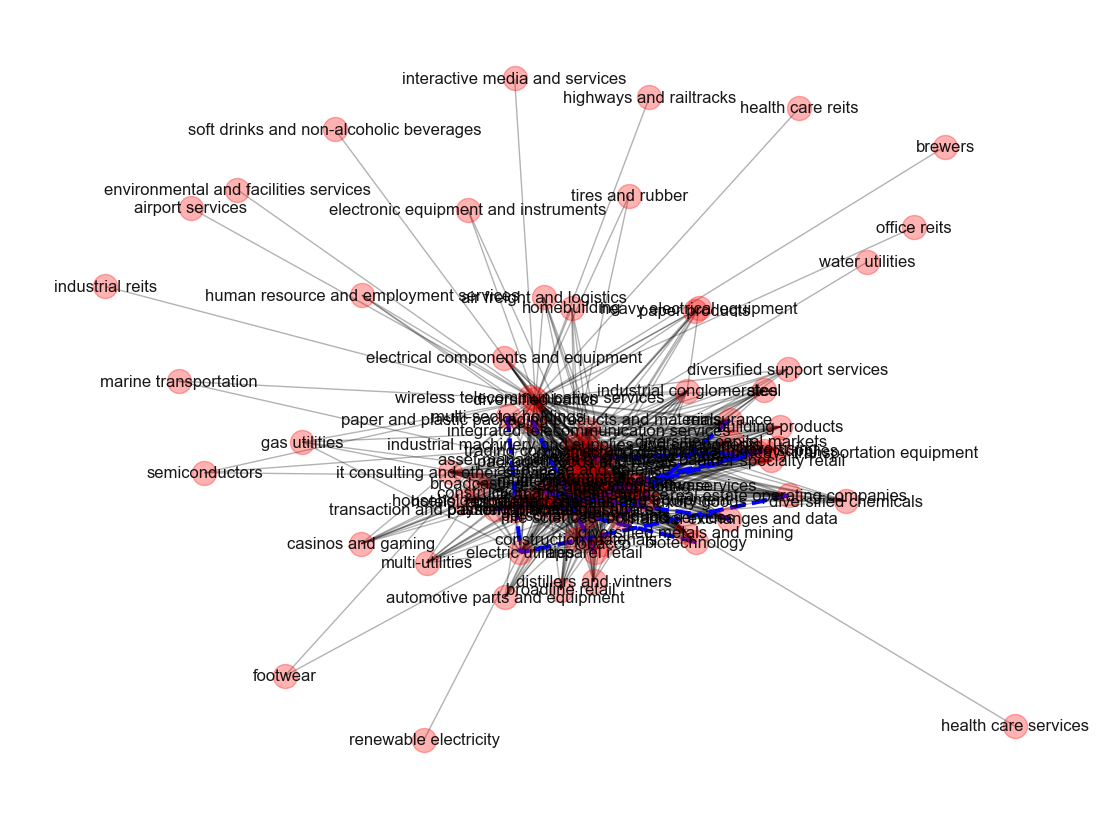

In [36]:
# Plot future links for filtered 2022 industry graph
plot_top10_missing_links(graph_2022_INDUST_filtered)


## For filtered graph with Countries as nodes


In [11]:
# Future links for filtered 2022 country graph
links_2022_COUNTRY_filtered = link_prediction_algorithms(graph_2022_COUNTRY_filtered)
links_2022_COUNTRY_filtered


,Source,Target,Algorithm,Score
0,denmark,austria,Jaccard Coefficient,0.923077
1,finland,austria,Jaccard Coefficient,0.923077
2,portugal,austria,Jaccard Coefficient,0.666667
3,denmark,portugal,Jaccard Coefficient,0.615385
4,finland,portugal,Jaccard Coefficient,0.615385
5,norway,portugal,Jaccard Coefficient,0.571429
6,belgium,portugal,Jaccard Coefficient,0.571429
7,luxembourg,portugal,Jaccard Coefficient,0.571429
8,ireland,portugal,Jaccard Coefficient,0.571429
9,denmark,austria,Adamic Adar Index,4.469848


    Jaccard Coefficient:
    Denmark and Austria, for example, as well as Finland and Austria, show a very high score of 0.923077, implying a significant overlap in their respective neighbor sets. This could indicate a strong likelihood of a connection or a dense network area where these countries are situated.

    Adamic Adar Index:
    Denmark, Finland, and Portugal, for instance, all have high scores with Austria, suggesting they share some unique or less-common connections, potentially pointing to specific areas of collaboration or similarity.

    Preferential Attachment:
    High scores here, like the 156 seen between Denmark and Austria or Finland and Austria, indicate these nodes (countries) are well-connected and thus have a higher propensity to form even more connections.

    Common Neighbor:
    The scores, such as 11.2 between Denmark and Austria or Finland and Austria, suggest these pairs have numerous mutual connections, hinting at shared interests or spheres of influence.

    Katz Score:
    The very low scores across all pairs, like 0.000002 between Denmark and Austria or Finland and Austria, suggest that while there might be indirect or extended connections, they are generally weak or distant. This indicates potential for future connection, especially as relationships evolve over time.

In a nutshell, the results appear plausible, reflecting various dimensions of connections and interactions among the countries, although the high scores in some methods may also suggest data anomalies or a highly interconnected network structure that warrants further scrutiny.


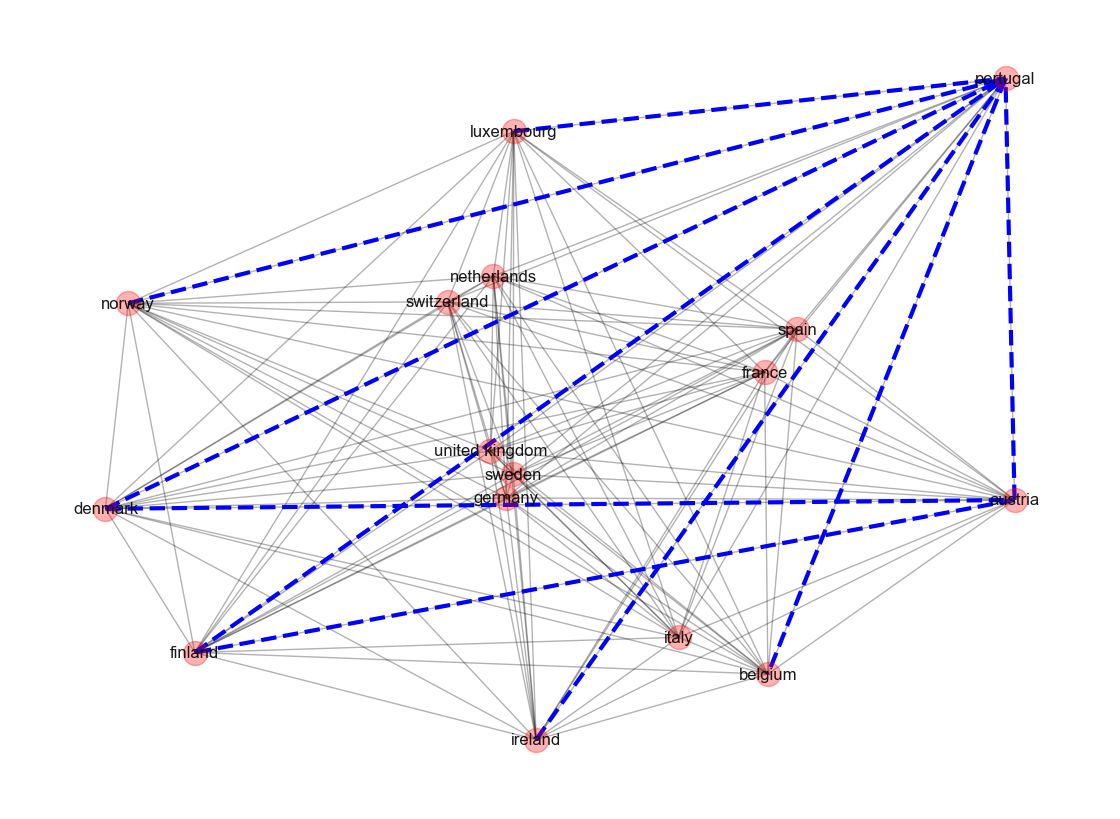

In [31]:
# Plot future links for filtered 2022 country graph
plot_top10_missing_links(graph_2022_COUNTRY_filtered)


## Other link predictions solely for demonstration's sake


### For filtered graph with edges based on person attributes


In [14]:
# Future links for filtered 2022 person graph
links_2022_person_filtered = link_prediction_algorithms(graph_2022_DACH_person_filtered)
links_2022_person_filtered


,Source,Target,Algorithm,Score
0,beiersdorf ag,verbund ag,Jaccard Coefficient,5.000000e-01
1,beiersdorf ag,commerzbank ag,Jaccard Coefficient,5.000000e-01
2,covestro ag,rheinmetall ag,Jaccard Coefficient,4.166667e-01
3,georg fischer ag,julius baer gruppe ag,Jaccard Coefficient,4.000000e-01
4,commerzbank ag,verbund ag,Jaccard Coefficient,3.333333e-01
5,swatch group ag,nestle sa,Jaccard Coefficient,3.333333e-01
6,sap se,gerresheimer ag,Jaccard Coefficient,3.333333e-01
7,roche holding ag,logitech international sa,Jaccard Coefficient,3.333333e-01
8,ems chemie holding ag,partners group holding ag,Jaccard Coefficient,3.333333e-01
9,bucher industries ag,credit suisse group ag,Jaccard Coefficient,3.333333e-01


### For filtered graph with edges based on city attributes


In [13]:
# Future links for filtered 2022 city graph
links_2022_city_filtered = link_prediction_algorithms(graph_2022_DACH_city_filtered)
links_2022_city_filtered


,Source,Target,Algorithm,Score
0,vifor pharma ag,gerresheimer ag,Jaccard Coefficient,1.000000
1,fuchs petrolub se,brenntag se,Jaccard Coefficient,0.812500
2,fuchs petrolub se,belimo holding ag,Jaccard Coefficient,0.803279
3,sartorius ag,brenntag se,Jaccard Coefficient,0.791667
4,fuchs petrolub se,partners group holding ag,Jaccard Coefficient,0.790323
5,bucher industries ag,belimo holding ag,Jaccard Coefficient,0.790323
6,partners group holding ag,belimo holding ag,Jaccard Coefficient,0.786885
7,fuchs petrolub se,covestro ag,Jaccard Coefficient,0.782609
8,henkel ag & co kgaa,sonova holding ag,Jaccard Coefficient,0.772152
9,gea group ag,heidelbergcement ag,Jaccard Coefficient,0.768293


### For filtered graph with edges based on organisation attributes


In [15]:
# Future links for filtered 2022 organisation graph
links_2022_org_filtered = link_prediction_algorithms(graph_2022_DACH_org_filtered)
links_2022_org_filtered


,Source,Target,Algorithm,Score
0,sartorius ag,bawag group ag,Jaccard Coefficient,0.825000
1,stmicroelectronics nv,puma se,Jaccard Coefficient,0.821138
2,zur rose group ag,fresenius medical care ag & co kgaa,Jaccard Coefficient,0.819672
3,sap se,deutsche post ag,Jaccard Coefficient,0.804878
4,temenos ag,deutsche bank ag,Jaccard Coefficient,0.801587
5,tui ag,stmicroelectronics nv,Jaccard Coefficient,0.800000
6,voestalpine ag,evonik industries ag,Jaccard Coefficient,0.791304
7,henkel ag & co kgaa,georg fischer ag,Jaccard Coefficient,0.776860
8,temenos ag,gea group ag,Jaccard Coefficient,0.775000
9,gea group ag,adecco group ag,Jaccard Coefficient,0.774194
